In [100]:
from sklearn import tree                                               # Visualize the decision tree
from sklearn.linear_model import LogisticRegression                    # Import Logistic Regression
from sklearn.preprocessing import LabelEncoder                         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('default of credit card clients.csv', )

df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [102]:
# Idnetify all the categorical variables in the data

cat_features = df.select_dtypes(include = "object").columns
print (cat_features)

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [103]:
#Label Encoding for object to numeric conversion

le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))
    #df[feat] = df[feat].astype(int)
    
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  30001 non-null  int32
 1   X1          30001 non-null  int32
 2   X2          30001 non-null  int32
 3   X3          30001 non-null  int32
 4   X4          30001 non-null  int32
 5   X5          30001 non-null  int32
 6   X6          30001 non-null  int32
 7   X7          30001 non-null  int32
 8   X8          30001 non-null  int32
 9   X9          30001 non-null  int32
 10  X10         30001 non-null  int32
 11  X11         30001 non-null  int32
 12  X12         30001 non-null  int32
 13  X13         30001 non-null  int32
 14  X14         30001 non-null  int32
 15  X15         30001 non-null  int32
 16  X16         30001 non-null  int32
 17  X17         30001 non-null  int32
 18  X18         30001 non-null  int32
 19  X19         30001 non-null  int32
 20  X20         30001 non-null  

In [104]:
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,30000,81,2,7,4,56,11,11,11,11,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
1,0,13,1,2,1,3,4,4,0,0,...,377,384,414,0,6670,0,0,0,0,1
2,11111,4,1,2,2,5,0,4,2,2,...,11832,11970,11338,0,4,4,4,0,2002,1
3,22222,80,1,2,2,13,2,2,2,2,...,3619,3949,4233,1494,1476,4,4,4,4750,0
4,23334,47,1,2,1,16,2,2,2,2,...,10317,10406,10457,2415,2535,645,336,262,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,22218,16,0,3,1,18,2,2,2,2,...,20263,11311,4471,7434,2464,5186,3251,4688,4,0
29997,22219,7,0,3,2,22,0,0,0,0,...,20456,15366,414,2135,4367,7168,784,0,0,0
29998,22220,24,0,2,2,16,6,5,4,0,...,7692,7488,6520,0,0,2594,4208,1959,3314,1
29999,22221,78,0,3,1,20,3,0,2,2,...,15893,1837,14461,7460,4259,583,1916,4928,1722,1


In [105]:
# Create class(y) and features(X) from the dataset

y = df['Y']
X = df.drop('Y',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [106]:
# scale numeric columns and perform the logistic regression

logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

In [107]:
# Logistic Regression

logclf = logistic_pipeline
logclf.fit(X_train, y_train)
y_pred = logclf.predict(X_test)

In [108]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6836  174]
 [1643  348]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.88      7010
           1       0.67      0.17      0.28      1991

    accuracy                           0.80      9001
   macro avg       0.74      0.57      0.58      9001
weighted avg       0.78      0.80      0.75      9001



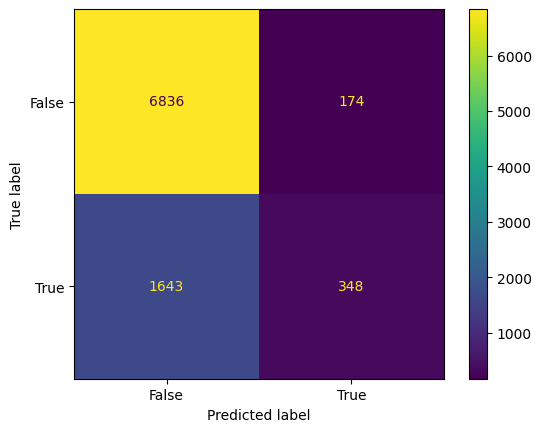

In [109]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

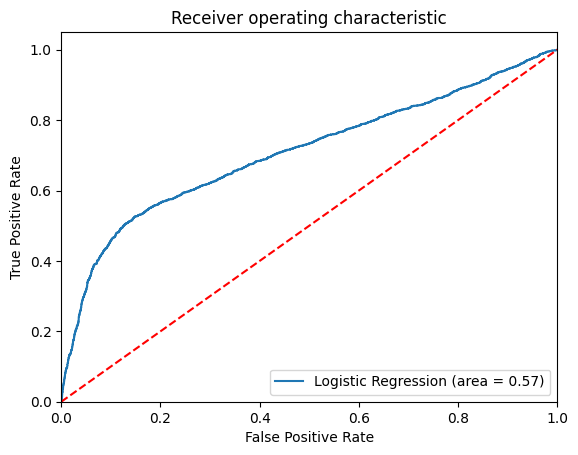

In [110]:
logit_roc_auc = roc_auc_score(y_test, logclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logclf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [111]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.798134
Precision: 0.666667
Recall: 0.174787
F1 score: 0.276960


In [112]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none','l1','l2','elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]


# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

c:\Users\Qthooloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Qthooloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Qthooloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\Qthooloo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug 

In [113]:
grid_result.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [131]:
lr_clf = LogisticRegression(solver='liblinear', penalty='l1', C = 100)
lr_clf.fit(X_train, y_train)

y_pred = lr_clf.predict(X_test)

*2. Decision Trees*

In [114]:
from sklearn import tree                                               # Visualize the decision tree
from sklearn.tree import DecisionTreeClassifier                        # Import the decision tree classifier
from sklearn.preprocessing import LabelEncoder                         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv('default of credit card clients.csv', header=1)

df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [116]:
# Identify all the categorical variables in the data

cat_features = df.select_dtypes(include = "object").columns
print (cat_features)

#Label Encoding for object to numeric conversion

le = LabelEncoder()

for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))
    
print (df.info())

Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 n

In [117]:
# Create class(y) and features(X) from the dataset

y = df['default payment next month']
X = df.drop('default payment next month',axis=1)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=8,
                       min_impurity_decrease=1e-06, random_state=42)

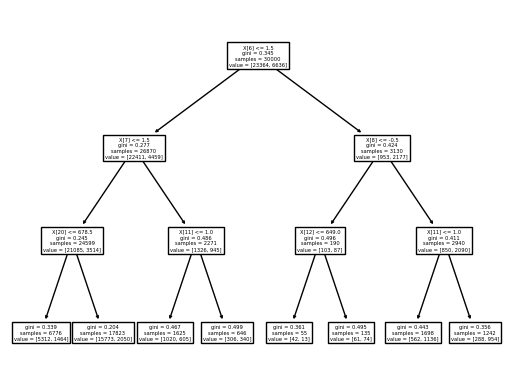

In [118]:
tree_para = {
    'max_leaf_nodes':[4,6,8,10,12,15,18,20,25,40,50],
    'min_impurity_decrease':[.000001,.00001,.0001,.001,.005,.01,.05,.1,.2],
    'max_depth':[2,3,4,5,10,15,20,30,50,100,125,150],
    'random_state':[42]
    }
tree_clf = GridSearchCV(DecisionTreeClassifier(), tree_para, n_jobs=-1, scoring='f1', error_score=0)
tree_clf = tree_clf.fit(X, y)
tree.plot_tree(tree_clf.best_estimator_)
tree_clf.best_estimator_


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4427  260]
 [ 827  486]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.65      0.37      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



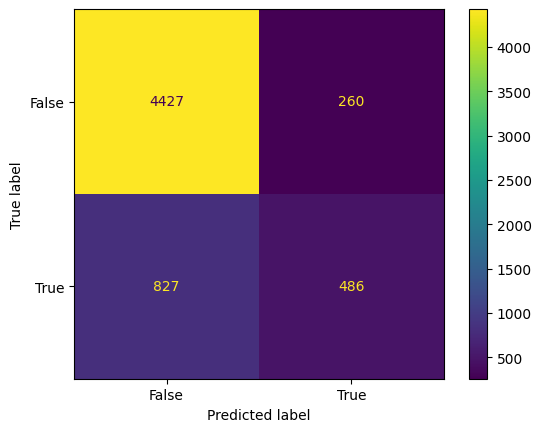

In [120]:
cfm = confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy: 0.818833
Precision: 0.651475
Recall: 0.370145
F1 score: 0.472074
ROC AUC: 0.753968


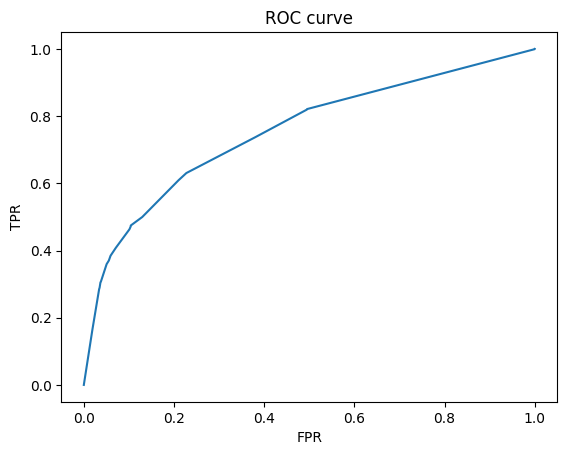

In [121]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
    
# ROC AUC
y_hat = tree_clf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_hat[:,1])
print('ROC AUC: %f' % auc)

fpr, tpr, _ = metrics.roc_curve(y_test, y_hat[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

3. Random Forest

In [122]:
from sklearn.ensemble import BaggingClassifier                         # Import bagging classifier
from sklearn.tree import DecisionTreeClassifier                        # Import decision tree classifier
from sklearn.ensemble import RandomForestClassifier                    # Import random forest classifier
from sklearn.ensemble import AdaBoostClassifier                        # Import Ada boost classifier
from sklearn.ensemble import GradientBoostingClassifier                # Import Gradient boost classifier
from sklearn.preprocessing import LabelEncoder                         # Encoding categorical data
from sklearn.model_selection import train_test_split                   # Splitting dataset into traning and testing sets
from sklearn.metrics import classification_report, confusion_matrix    # Evaluting the performance of the classifier

# More performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('default of credit card clients.csv', header=1)
cat_features = df.select_dtypes(include = "object").columns
le = LabelEncoder()
for col in cat_features:
    df[col] = le.fit_transform(df[col].astype(str))


y = df['default payment next month']
X = df.drop('default payment next month',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

### Implement Random Forest Classifier

In [124]:
rnd_params = {
    'max_leaf_nodes':[25,30,40,50,75,100],
    'n_estimators':[500,750,1000],
    'max_depth':[10,15,20],
    'random_state':[42]
    }

rnd_clf = GridSearchCV(RandomForestClassifier(), rnd_params, n_jobs=-1, scoring='f1', error_score=0)
rnd_clf = rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [125]:
rnd_clf.best_estimator_

RandomForestClassifier(max_depth=15, max_leaf_nodes=75, n_estimators=750,
                       random_state=42)

### 4. Bagging, Boosting & Gradientboost

In [126]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [127]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # very similar predictions

0.9733333333333334

In [128]:
#Adaboost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [129]:
#Gradient Boost

gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, random_state = 0)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=0)

### 5. Comparison

Ada boost - ROC AUC: 0.777891
Gradient boost - ROC AUC: 0.759928
Bagging - ROC AUC: 0.770761
Random Forest - ROC AUC: 0.777027
Decision Tree - ROC AUC: 0.753968
Logistic Regression - ROC AUC: 0.753968


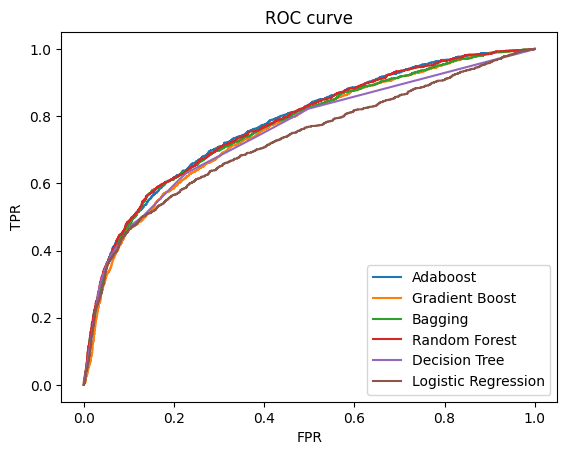

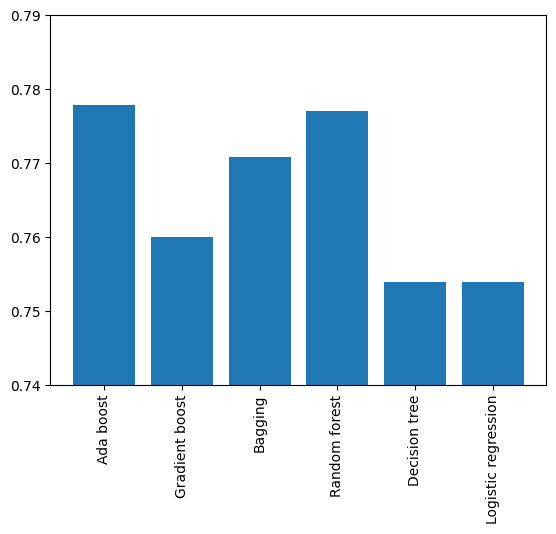

In [138]:
# ROC AUC
y_hat = ada_clf.predict_proba(X_test)
y_hat_gb = gb_clf.predict_proba(X_test)
y_hat_bag = bag_clf.predict_proba(X_test)
y_hat_rnd = rnd_clf.predict_proba(X_test)
y_hat_tree = tree_clf.predict_proba(X_test)
y_hat_lr = lr_clf.predict_proba(X_test)

model_accuracy = {}

auc = roc_auc_score(y_test, y_hat[:,1])
print('Ada boost - ROC AUC: %f' % auc)
model_accuracy.update({"Ada boost": auc})

auc = roc_auc_score(y_test, y_hat_gb[:,1])
print('Gradient boost - ROC AUC: %f' % auc)
model_accuracy.update({"Gradient boost": auc})

auc = roc_auc_score(y_test, y_hat_bag[:,1])
print('Bagging - ROC AUC: %f' % auc)
model_accuracy.update({"Bagging": auc})

auc = roc_auc_score(y_test, y_hat_rnd[:,1])
print('Random Forest - ROC AUC: %f' % auc)
model_accuracy.update({"Random forest": auc})

auc = roc_auc_score(y_test, y_hat_tree[:,1])
print('Decision Tree - ROC AUC: %f' % auc)
model_accuracy.update({"Decision tree": auc})

auc = roc_auc_score(y_test, y_hat_tree[:,1])
print('Logistic Regression - ROC AUC: %f' % auc)
model_accuracy.update({"Logistic regression": auc})

fpr, tpr, _ = metrics.roc_curve(y_test, y_hat[:,1])
fpr_gb, tpr_gb, _ = metrics.roc_curve(y_test, y_hat_gb[:,1])
fpr_bag, tpr_bag, _ = metrics.roc_curve(y_test, y_hat_bag[:,1])
fpr_rnd, tpr_rnd, _ = metrics.roc_curve(y_test, y_hat_rnd[:,1])
fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test, y_hat_tree[:,1])
fpr_lr, tpr_lr, _ = metrics.roc_curve(y_test, y_hat_lr[:,1])

plt.clf()
plt.plot(fpr, tpr, label="Adaboost")
plt.plot(fpr_gb, tpr_gb, label="Gradient Boost")
plt.plot(fpr_bag, tpr_bag, label="Bagging")
plt.plot(fpr_rnd, tpr_rnd, label="Random Forest")
plt.plot(fpr_tree, tpr_tree, label="Decision Tree")
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

model_type = list(model_accuracy.keys())
model_acc = list(model_accuracy.values())

plt.bar(range(len(model_accuracy)), model_acc, tick_label=model_type)
plt.ylim(.74, .79)
plt.xticks(rotation = 90)
plt.show()

You can see from the above charts that Ada boost and random forest models are the most accurate in this particular case.